# Make Data Count: Exploratory Data Analysis

Comprehensive EDA of the competition data to understand:
- Label distribution and patterns
- Dataset reference types and sources
- Paper content structure
- Missing data patterns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
from urllib.parse import urlparse
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

## 1. Load and Examine Training Labels

In [ ]:
# Load training labels
train_labels = pd.read_csv('../dataset/train_labels.csv')
sample_submission = pd.read_csv('../dataset/sample_submission.csv')

print(f"Training labels shape: {train_labels.shape}")
print(f"Sample submission shape: {sample_submission.shape}")
print("\nTraining labels columns:", train_labels.columns.tolist())
print("Sample submission columns:", sample_submission.columns.tolist())

In [4]:
# Basic statistics
print("=== TRAINING LABELS OVERVIEW ===")
print(train_labels.head(10))
print("\n=== BASIC INFO ===")
print(train_labels.info())
print("\n=== VALUE COUNTS ===")
print("Type distribution:")
print(train_labels['type'].value_counts())
print(f"\nUnique articles: {train_labels['article_id'].nunique()}")
print(f"Unique datasets: {train_labels['dataset_id'].nunique()}")

=== TRAINING LABELS OVERVIEW ===
               article_id                      dataset_id     type
0    10.1002_2017jc013030  https://doi.org/10.17882/49388  Primary
1  10.1002_anie.201916483                         Missing  Missing
2  10.1002_anie.202005531                         Missing  Missing
3  10.1002_anie.202007717                         Missing  Missing
4  10.1002_chem.201902131                         Missing  Missing
5  10.1002_chem.201903120                         Missing  Missing
6  10.1002_chem.202000235                         Missing  Missing
7  10.1002_chem.202001412                         Missing  Missing
8  10.1002_chem.202001668                         Missing  Missing
9  10.1002_chem.202003167                         Missing  Missing

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  1028 no

## 2. Label Distribution Analysis

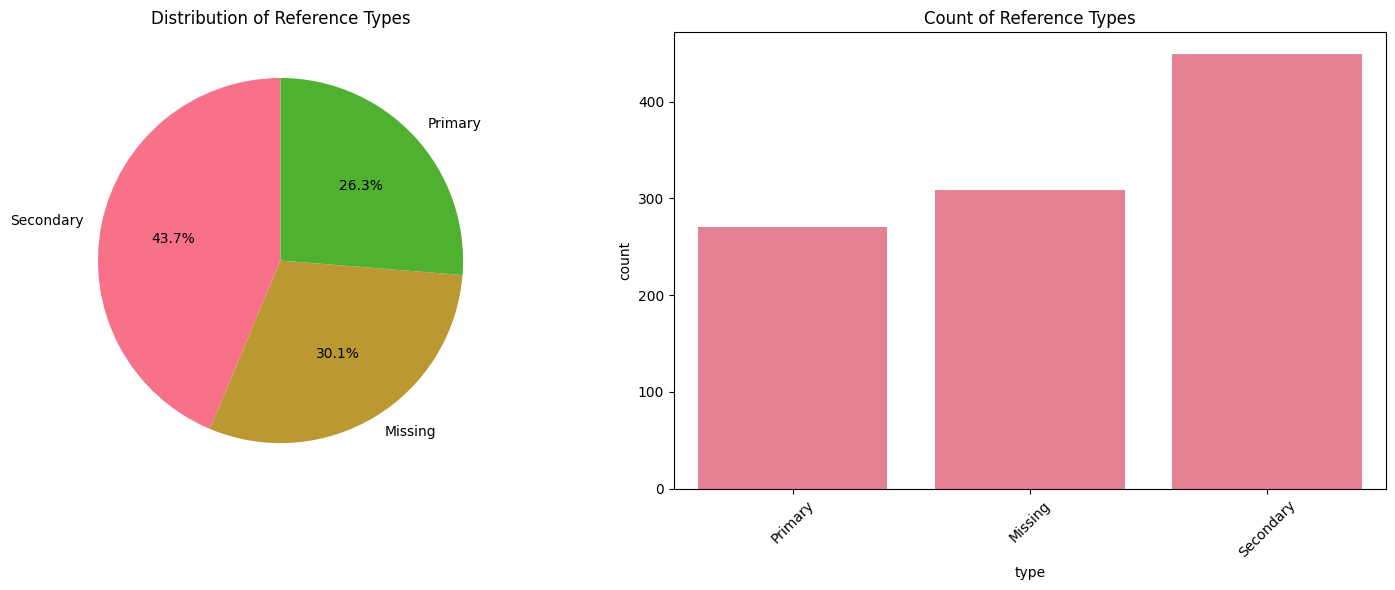

Reference type percentages:
type
Secondary    43.68
Missing      30.06
Primary      26.26
Name: count, dtype: float64


In [5]:
# Visualize type distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
type_counts = train_labels['type'].value_counts()
axes[0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Reference Types')

# Bar chart
sns.countplot(data=train_labels, x='type', ax=axes[1])
axes[1].set_title('Count of Reference Types')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print percentages
print("Reference type percentages:")
print((train_labels['type'].value_counts() / len(train_labels) * 100).round(2))

In [6]:
# Analyze non-missing entries
non_missing = train_labels[train_labels['type'] != 'Missing'].copy()
print(f"Non-missing entries: {len(non_missing)} ({len(non_missing)/len(train_labels)*100:.1f}%)")
print(f"Missing entries: {len(train_labels) - len(non_missing)} ({(len(train_labels) - len(non_missing))/len(train_labels)*100:.1f}%)")

if len(non_missing) > 0:
    print("\nNon-missing type distribution:")
    print(non_missing['type'].value_counts())
    print("\nNon-missing type percentages:")
    print((non_missing['type'].value_counts() / len(non_missing) * 100).round(2))

Non-missing entries: 719 (69.9%)
Missing entries: 309 (30.1%)

Non-missing type distribution:
type
Secondary    449
Primary      270
Name: count, dtype: int64

Non-missing type percentages:
type
Secondary    62.45
Primary      37.55
Name: count, dtype: float64


## 3. Dataset Reference Analysis

In [7]:
# Analyze dataset URLs/DOIs
dataset_ids = non_missing['dataset_id'].dropna().unique()
print(f"Unique dataset references: {len(dataset_ids)}")

# Analyze URL patterns
url_domains = []
doi_patterns = []

for dataset_id in dataset_ids:
    if pd.notna(dataset_id) and dataset_id != 'Missing':
        if 'doi.org' in dataset_id:
            # Extract DOI pattern
            if '/10.' in dataset_id:
                doi_part = dataset_id.split('/10.')[1].split('/')[0]
                doi_patterns.append(f"10.{doi_part}")
        else:
            # Extract domain
            try:
                domain = urlparse(dataset_id).netloc
                if domain:
                    url_domains.append(domain)
            except:
                pass

print(f"\nTop DOI prefixes:")
doi_counter = Counter(doi_patterns)
for doi, count in doi_counter.most_common(10):
    print(f"  {doi}: {count}")

print(f"\nTop URL domains:")
domain_counter = Counter(url_domains)
for domain, count in domain_counter.most_common(10):
    print(f"  {domain}: {count}")

Unique dataset references: 719

Top DOI prefixes:
  10.5061: 79
  10.15468: 38
  10.5066: 36
  10.5281: 22
  10.3886: 18
  10.5256: 18
  10.1594: 15
  10.7937: 12
  10.6073: 10
  10.17882: 9

Top URL domains:


Data repository distribution:
  Other: 607
  Dryad: 79
  Zenodo: 22
  TCIA: 11


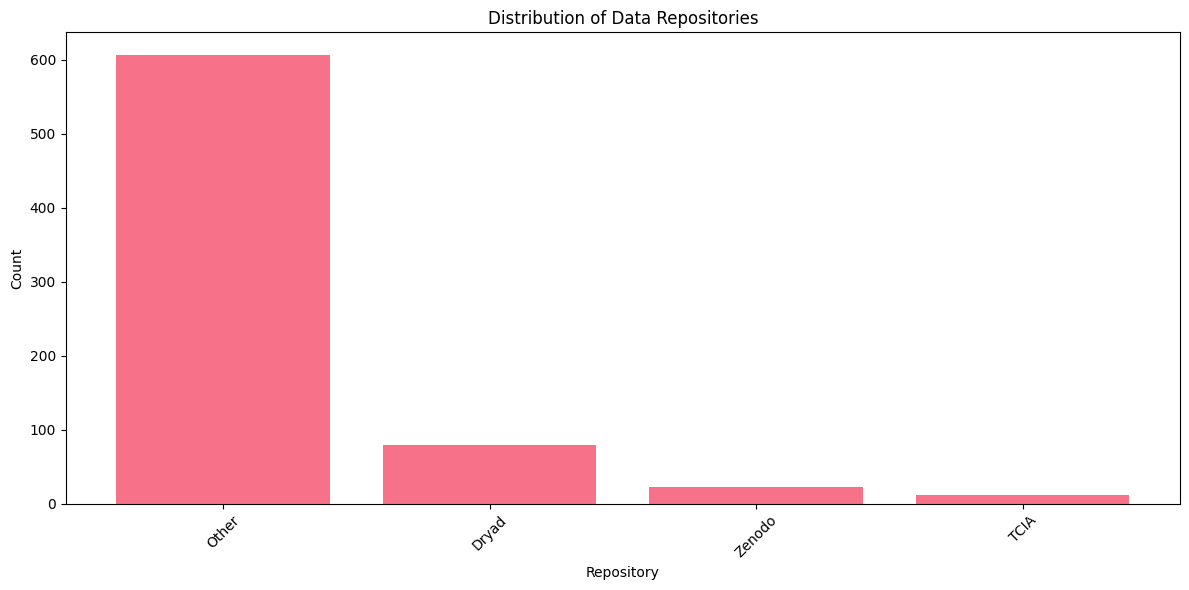

In [8]:
# Visualize top data repositories
all_sources = []
for dataset_id in dataset_ids:
    if pd.notna(dataset_id) and dataset_id != 'Missing':
        if 'dryad' in dataset_id.lower():
            all_sources.append('Dryad')
        elif 'zenodo' in dataset_id.lower():
            all_sources.append('Zenodo')
        elif 'figshare' in dataset_id.lower():
            all_sources.append('Figshare')
        elif 'github' in dataset_id.lower():
            all_sources.append('GitHub')
        elif 'usgs' in dataset_id.lower():
            all_sources.append('USGS')
        elif 'tcia' in dataset_id.lower():
            all_sources.append('TCIA')
        elif 'ncbi' in dataset_id.lower():
            all_sources.append('NCBI')
        else:
            all_sources.append('Other')

source_counts = Counter(all_sources)
print("Data repository distribution:")
for source, count in source_counts.most_common():
    print(f"  {source}: {count}")

# Plot repository distribution
if source_counts:
    plt.figure(figsize=(12, 6))
    sources, counts = zip(*source_counts.most_common())
    plt.bar(sources, counts)
    plt.title('Distribution of Data Repositories')
    plt.xlabel('Repository')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 4. Article Analysis

Articles with references: 523
Average references per article: 1.97
Max references per article: 32

Distribution of references per article:
  1 references: 447 articles
  2 references: 30 articles
  3 references: 14 articles
  4 references: 6 articles
  5 references: 2 articles
  7 references: 1 articles
  8 references: 1 articles
  10 references: 2 articles
  11 references: 1 articles
  12 references: 1 articles
  13 references: 1 articles
  15 references: 1 articles
  16 references: 2 articles
  17 references: 1 articles
  18 references: 3 articles
  20 references: 1 articles
  22 references: 2 articles
  23 references: 1 articles
  25 references: 2 articles
  27 references: 1 articles
  29 references: 1 articles
  31 references: 1 articles
  32 references: 1 articles


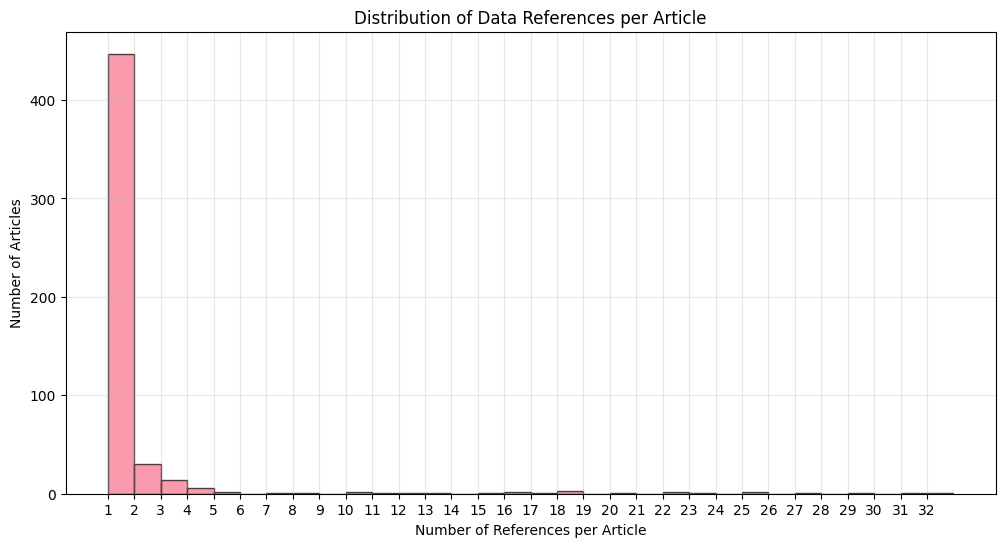

In [9]:
# Articles per reference count
article_ref_counts = train_labels.groupby('article_id').size()
print(f"Articles with references: {len(article_ref_counts)}")
print(f"Average references per article: {article_ref_counts.mean():.2f}")
print(f"Max references per article: {article_ref_counts.max()}")

print("\nDistribution of references per article:")
ref_dist = article_ref_counts.value_counts().sort_index()
for refs, count in ref_dist.items():
    print(f"  {refs} references: {count} articles")

# Plot reference distribution
plt.figure(figsize=(12, 6))
plt.hist(article_ref_counts, bins=range(1, article_ref_counts.max()+2), alpha=0.7, edgecolor='black')
plt.xlabel('Number of References per Article')
plt.ylabel('Number of Articles')
plt.title('Distribution of Data References per Article')
plt.xticks(range(1, article_ref_counts.max()+1))
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# Analyze articles with multiple references
multi_ref_articles = article_ref_counts[article_ref_counts > 1]
if len(multi_ref_articles) > 0:
    print(f"Articles with multiple references: {len(multi_ref_articles)}")
    
    # Look at reference types for multi-reference articles
    sample_multi = multi_ref_articles.head().index
    print("\nSample multi-reference articles:")
    for article_id in sample_multi:
        article_refs = train_labels[train_labels['article_id'] == article_id]
        print(f"\n{article_id}:")
        for _, row in article_refs.iterrows():
            print(f"  - {row['type']}: {row['dataset_id']}")

Articles with multiple references: 76

Sample multi-reference articles:

10.1002_mp.14424:
  - Secondary: https://doi.org/10.7937/k9/tcia.2015.pf0m9rei
  - Primary: https://doi.org/10.7937/tcia.2020.6c7y-gq39

10.1007_s00259-022-06053-8:
  - Secondary: https://doi.org/10.7937/k9/tcia.2017.7hs46erv
  - Secondary: https://doi.org/10.7937/tcia.2019.30ilqfcl

10.1007_s00382-022-06361-7:
  - Primary: https://doi.org/10.6075/j0154fjj
  - Primary: https://doi.org/10.6075/j089161b

10.1016_j.ast.2022.107401:
  - Primary: https://doi.org/10.17862/cranfield.rd.19146182
  - Primary: https://doi.org/10.17862/cranfield.rd.19146182.v1

10.1016_j.fuel.2022.125768:
  - Primary: https://doi.org/10.11583/dtu.20555586
  - Primary: https://doi.org/10.11583/dtu.20555586.v3


## 5. Paper Content Analysis

In [ ]:
# Explore paper directory structure
train_dir = Path('../dataset/train')
test_dir = Path('../dataset/test')

print("Training data structure:")
if train_dir.exists():
    subdirs = [d for d in train_dir.iterdir() if d.is_dir()]
    for subdir in subdirs[:5]:  # Show first 5 subdirectories
        files = list(subdir.iterdir())
        print(f"  {subdir.name}: {len(files)} files")
        if files:
            print(f"    Sample files: {[f.name for f in files[:3]]}")
    print(f"  Total article directories: {len(subdirs)}")
else:
    print("  Train directory not found")

In [12]:
# Sample a few papers to understand structure
def analyze_paper_structure(paper_dir):
    """Analyze the structure of a single paper directory"""
    files = list(paper_dir.iterdir())
    file_types = {}
    
    for file in files:
        ext = file.suffix.lower()
        file_types[ext] = file_types.get(ext, 0) + 1
    
    return file_types, files

if train_dir.exists():
    sample_papers = list(train_dir.iterdir())[:3]
    
    for paper_dir in sample_papers:
        if paper_dir.is_dir():
            file_types, files = analyze_paper_structure(paper_dir)
            print(f"\n=== {paper_dir.name} ===")
            print(f"File types: {file_types}")
            
            # Try to read a sample file
            for file in files[:2]:
                try:
                    if file.suffix.lower() in ['.xml', '.txt']:
                        with open(file, 'r', encoding='utf-8') as f:
                            content = f.read()[:500]
                            print(f"\nSample from {file.name} ({len(content)} chars):")
                            print(content[:200] + "..." if len(content) > 200 else content)
                        break
                except Exception as e:
                    print(f"Could not read {file.name}: {e}")


=== PDF ===
File types: {'.pdf': 524}

=== XML ===
File types: {'.xml': 400}

Sample from 10.1002_2017jc013030.xml (500 chars):
<?xml version="1.0" encoding="UTF-8"?><html><body><tei xml:space="preserve" xmlns="http://www.tei-c.org/ns/1.0" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-i...


## 6. Missing Pattern Analysis

In [13]:
# Analyze missing patterns
missing_articles = train_labels[train_labels['type'] == 'Missing']['article_id'].unique()
referenced_articles = train_labels[train_labels['type'] != 'Missing']['article_id'].unique()

print(f"Articles with only missing references: {len(missing_articles)}")
print(f"Articles with at least one reference: {len(referenced_articles)}")

# Check if any articles have both missing and non-missing
overlap = set(missing_articles) & set(referenced_articles)
print(f"Articles with both missing and non-missing references: {len(overlap)}")

if overlap:
    print("\nSample articles with mixed references:")
    for article_id in list(overlap)[:3]:
        article_refs = train_labels[train_labels['article_id'] == article_id]
        print(f"\n{article_id}:")
        for _, row in article_refs.iterrows():
            print(f"  - {row['type']}: {row['dataset_id']}")

Articles with only missing references: 309
Articles with at least one reference: 214
Articles with both missing and non-missing references: 0


## 7. Publication Pattern Analysis

Top journals by number of articles:
  other: 999
  ece3: 9
  chem: 6
  anie: 3
  mp: 2
  ejoc: 2
  ecs2: 2
  esp: 2
  2017jc013030: 1
  ejic: 1


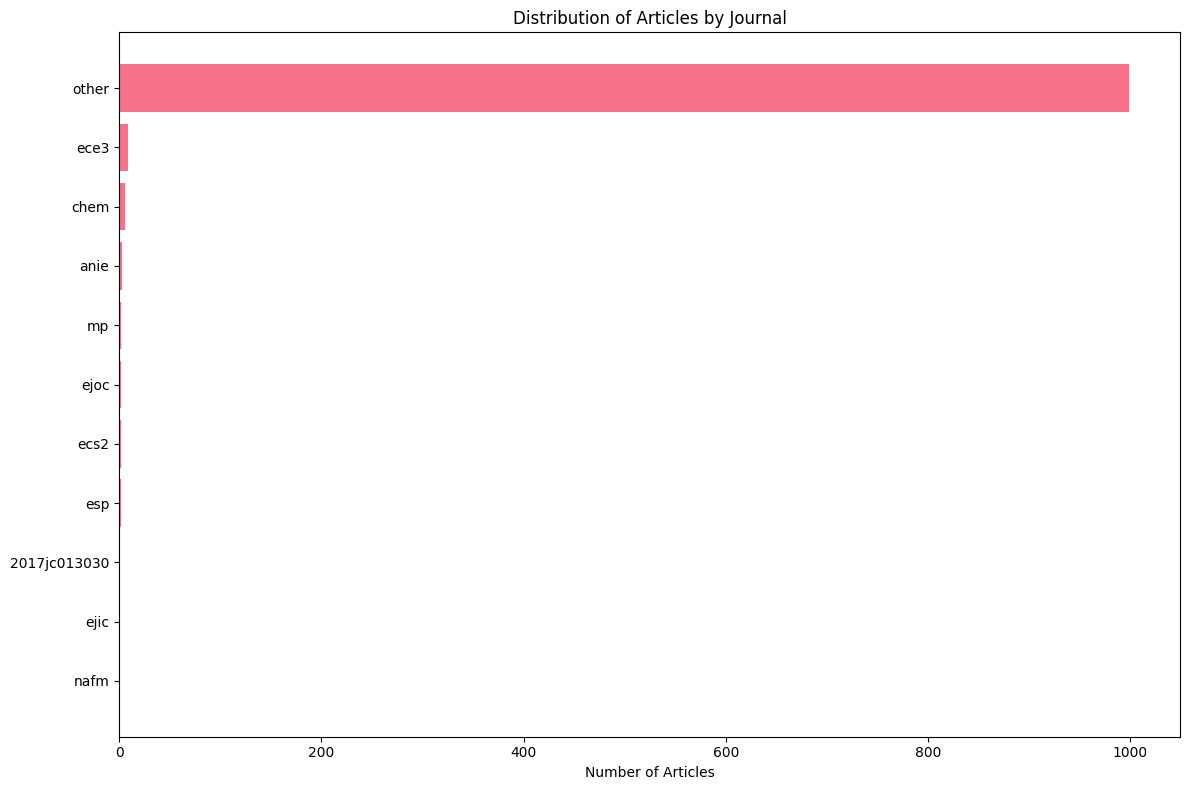

In [14]:
# Extract journal/publisher info from article IDs
def extract_journal_info(article_id):
    """Extract journal information from DOI-style article ID"""
    if '10.1002' in article_id:
        # Wiley journals
        parts = article_id.split('_')
        if len(parts) >= 2:
            return parts[1].split('.')[0]  # Journal abbreviation
    return 'other'

# Analyze journal distribution
journals = train_labels['article_id'].apply(extract_journal_info)
journal_counts = journals.value_counts()

print("Top journals by number of articles:")
for journal, count in journal_counts.head(10).items():
    print(f"  {journal}: {count}")

# Plot journal distribution
plt.figure(figsize=(12, 8))
top_journals = journal_counts.head(15)
plt.barh(range(len(top_journals)), top_journals.values)
plt.yticks(range(len(top_journals)), top_journals.index)
plt.xlabel('Number of Articles')
plt.title('Distribution of Articles by Journal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Summary and Key Insights

In [15]:
print("=== KEY INSIGHTS ===")
print(f"\n1. Dataset Size:")
print(f"   - Total entries: {len(train_labels):,}")
print(f"   - Unique articles: {train_labels['article_id'].nunique():,}")
print(f"   - Unique datasets: {train_labels['dataset_id'].nunique():,}")

print(f"\n2. Label Distribution:")
type_pcts = (train_labels['type'].value_counts() / len(train_labels) * 100).round(1)
for ref_type, pct in type_pcts.items():
    print(f"   - {ref_type}: {pct}%")

print(f"\n3. Reference Patterns:")
print(f"   - Articles with multiple references: {len(multi_ref_articles) if 'multi_ref_articles' in locals() else 0}")
print(f"   - Average references per article: {article_ref_counts.mean():.2f}")

print(f"\n4. Data Repositories:")
if 'source_counts' in locals():
    for source, count in list(source_counts.most_common(5)):
        print(f"   - {source}: {count}")

print(f"\n5. Challenge Areas:")
print(f"   - High proportion of missing references ({type_pcts.get('Missing', 0)}%)")
print(f"   - Multiple reference types per paper")
print(f"   - Diverse data repository formats")
print(f"   - Need to extract from various paper formats (XML, PDF, etc.)")

=== KEY INSIGHTS ===

1. Dataset Size:
   - Total entries: 1,028
   - Unique articles: 523
   - Unique datasets: 720

2. Label Distribution:
   - Secondary: 43.7%
   - Missing: 30.1%
   - Primary: 26.3%

3. Reference Patterns:
   - Articles with multiple references: 76
   - Average references per article: 1.97

4. Data Repositories:
   - Other: 607
   - Dryad: 79
   - Zenodo: 22
   - TCIA: 11

5. Challenge Areas:
   - High proportion of missing references (30.1%)
   - Multiple reference types per paper
   - Diverse data repository formats
   - Need to extract from various paper formats (XML, PDF, etc.)
